<h1 style="text-align: center"> Pima Indians Diabetes Database </h1>

<p><b><i> first i will do some explaratory data analysis to he data set to get some insights and visulizations</i></b></p>

<h4> data wrangling process </h4>
<ol>
    <li>data gathering </li>
    <li>data assesing </li>
    <li>data cleaing </li>
</ol>
<h6> then i will do some analysis </h6>
<h6> then i will make an classification model

In [5]:
## importing some usfel data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## data gathering 
- i downloded the data from kaggle website then upload it to my nootbok

In [6]:
df = pd.read_csv('diabetes.csv')
print('the data has {} column and {} rows'.format(df.shape[1] ,df.shape[0]))

the data has 9 column and 768 rows


## data assesing 
- here i will see the data to get guick overview about the records and know if there any problems 

#### visual assesment 

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- <p style="color:red" > there is some 0 value in the features column and that doesn't make any sense </p>

#### visual assesment

In [8]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- <p style="color:red" >all data types are correct but its clear the the null values represented with 0 not null </p>

In [9]:
# check duplicate values 
if bool(df.duplicated().sum()) :
    print('ther is duplicate rows')
else :
    print('ther is no duplicate rows')

ther is no duplicate rows


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### assesing report 
change the zeros values in <i>Glucose-BloodPressure-SkinThickness-Insulin-BMI</i> with the mean <br> 
<p style="text-align: center" ><b> this is the only problem in the data set that need to clean</b></p>

## data cleaning

###### define .
- there is 0 value in some column thet doesn't make any sense so i will convert them to the means value  

In [11]:
(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

###### code

In [12]:
from sklearn.impute import SimpleImputer 
need_to_vonvert = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
ImputedModule = SimpleImputer(missing_values = 0 , strategy ='mean') 
Imputed = ImputedModule.fit(need_to_vonvert) 
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Imputed.transform(need_to_vonvert) 
 

##### test

In [13]:
(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h1 style="text-align: center; color:red"> EDA </h1>

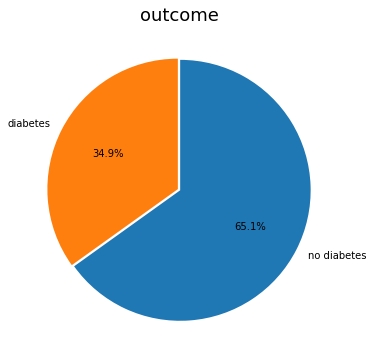

In [17]:
from matplotlib import rcParams
## see outcome counts
rcParams['figure.figsize'] =(8,6)
plt.pie(x=df['Outcome'].value_counts().values ,explode = [0.01,0.01] ,
            labels =['no diabetes', 'diabetes'] , startangle = 90, autopct= '%1.1f%%', counterclock = False);
plt.title('outcome' ,fontsize=18);

##### see the counts of the Pregnancies

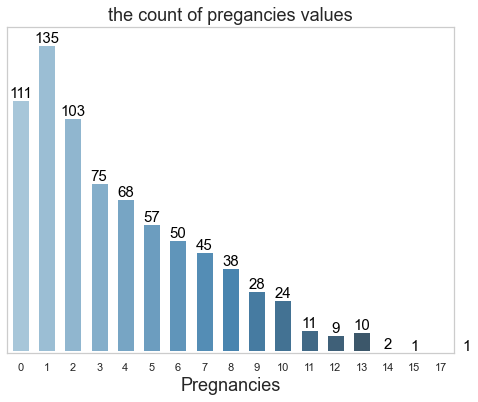

In [18]:
from matplotlib import rcParams
sns.set(style="whitegrid")
groupedvalues = df['Pregnancies'].value_counts()
g=sns.countplot(x="Pregnancies", data=df,linewidth=5 ,palette="Blues_d");
rcParams['figure.figsize'] =(15,10)
for index, row in zip(groupedvalues.index ,groupedvalues.values):
    g.text(index ,row, round(row,2), color='black', ha="center" , fontsize=15)
g.axes.get_yaxis().set_visible(False)
plt.xlabel('Pregnancies' , fontsize=18);
plt.title('the count of pregancies values' , fontsize=18);

##### the relation between age and diabetes

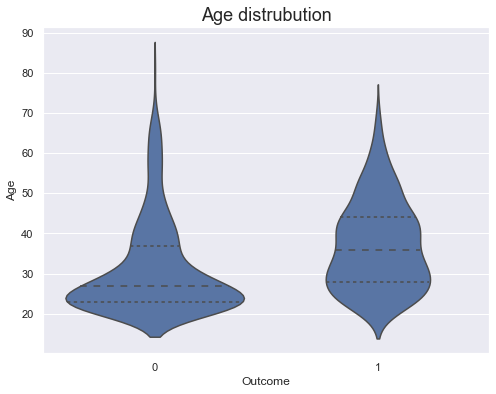

In [20]:
sns.set()
rcParams['figure.figsize'] =(8,6)
sns.violinplot(data=df, x='Outcome', y='Age', color=sns.color_palette()[0] , inner='quartile' );
plt.xlabel('Outcome');
plt.ylabel('Age');
plt.title('Age distrubution' , fontsize=18);

#### see corelation 

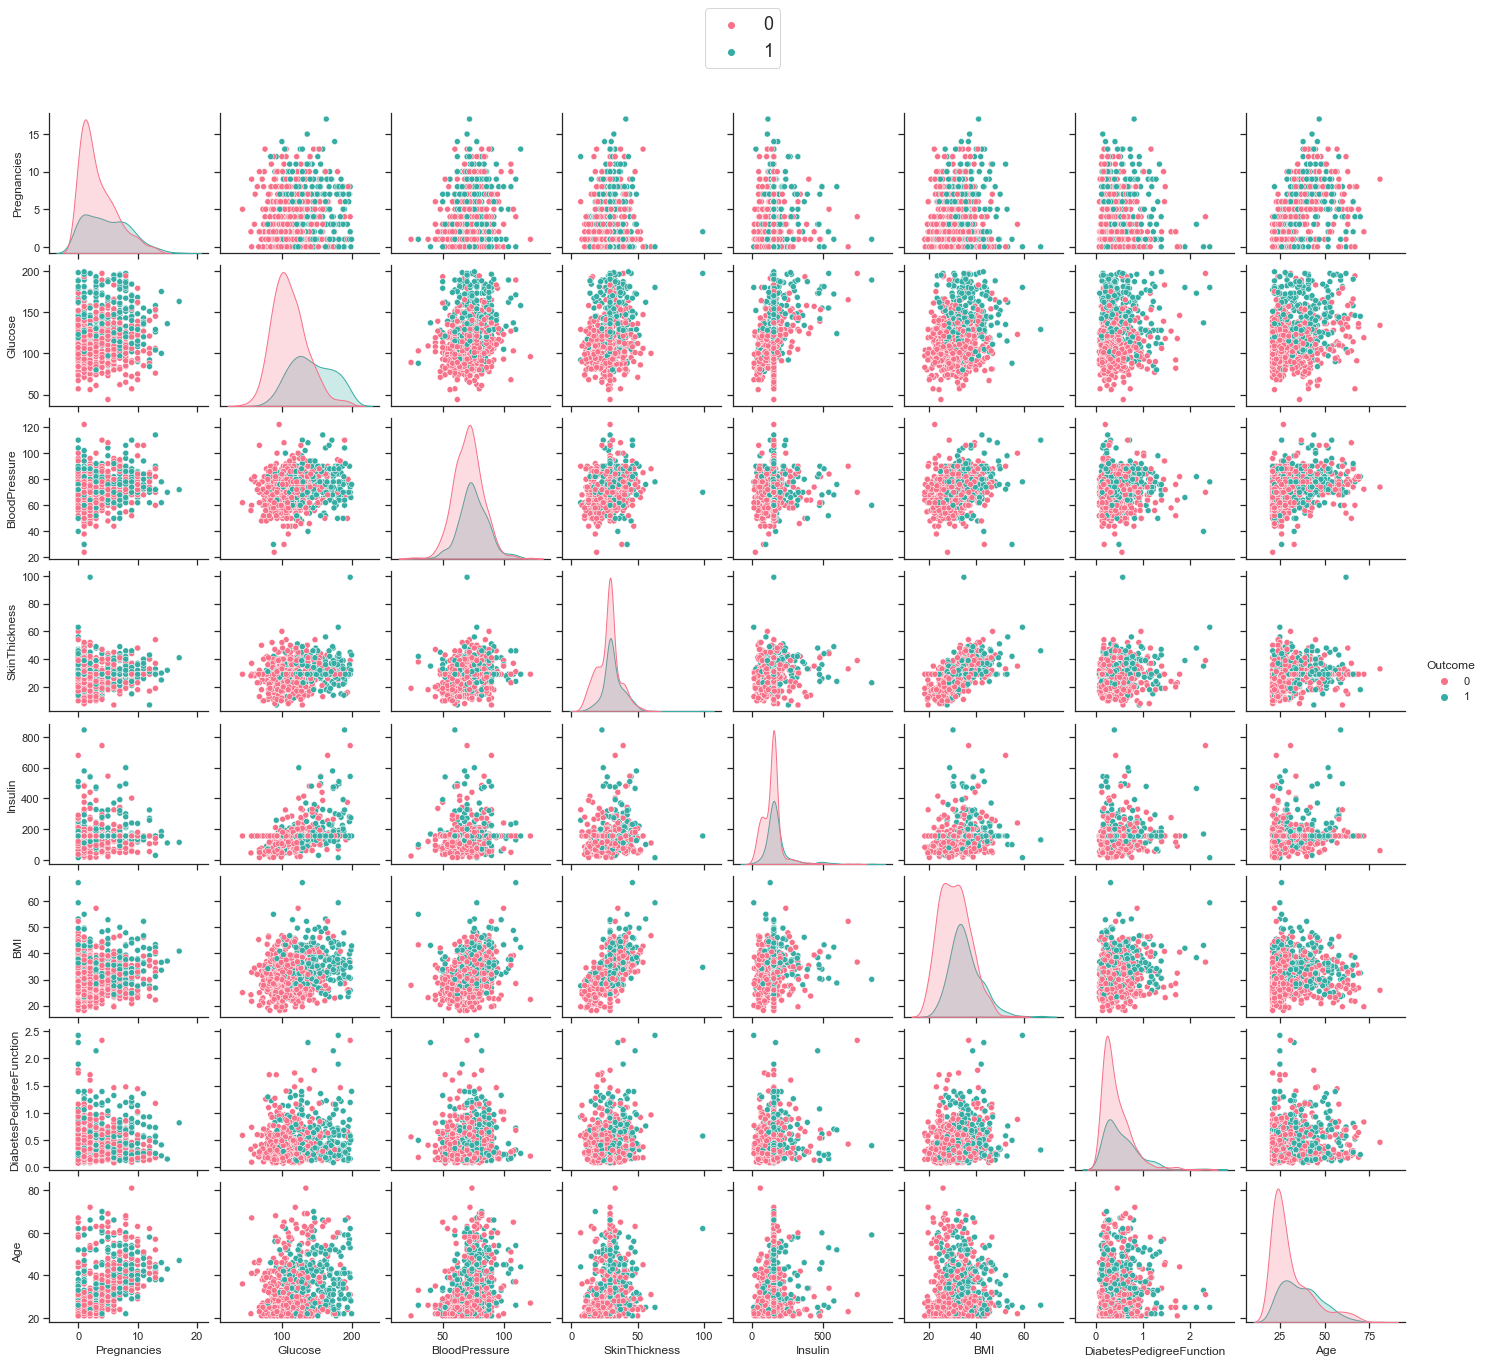

In [231]:
g = sns.set(style="ticks", color_codes=True)
g= sns.pairplot(df, hue="Outcome", palette="husl" );
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1 , fontsize=18);
g.fig.subplots_adjust(top=0.92, bottom=0.08);


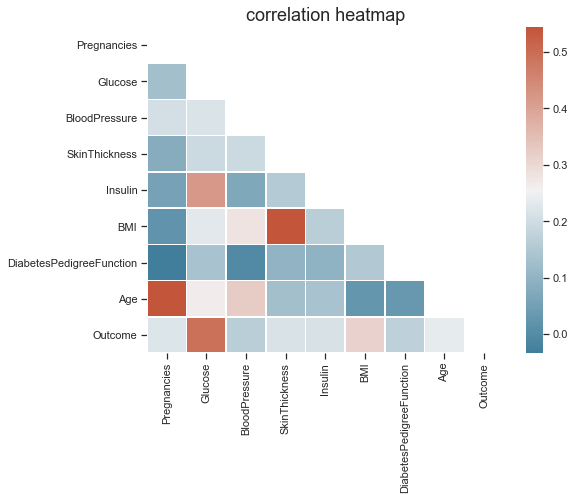

In [22]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool));
cmap = sns.diverging_palette(230, 20, as_cmap=True);
sns.heatmap(corr, mask=mask, cmap=cmap , linewidths=.5);
plt.title('correlation heatmap' , fontsize=18);

# classification model 

In [140]:
#determine x , y
x = df.drop('Outcome' , axis=1)
y = df.Outcome

x.shape , y.shape

((768, 8), (768,))

### data rescaling

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True) 
x = scaler.fit_transform(x) 
print('X \n' , x[:2]) 
print('y \n' , y[:2].values)

X 
 [[ 6.39947260e-01  8.65108070e-01 -3.35182392e-02  6.65502121e-01
  -3.34507888e-16  1.66291742e-01  4.68491977e-01  1.42599540e+00]
 [-8.44885053e-01 -1.20616153e+00 -5.29859033e-01 -1.74633816e-02
  -3.34507888e-16 -8.52531177e-01 -3.65060778e-01 -1.90671905e-01]]
y 
 [1 0]


### data splitting

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)



x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=44, shuffle =True) 
 
print('X_train shape is ' , x_train.shape) 
print('X_test shape is ' , x_test.shape) 
print('y_train shape is ' , y_train.shape) 
print('y_test shape is ' , y_test.shape) 

X_train shape is  (537, 45)
X_test shape is  (231, 45)
y_train shape is  (537,)
y_test shape is  (231,)


### logistic regression "classification"
<p style="color:red" > if i try neural_network  it will give similar results as the logistic regression model </p>

In [143]:
from sklearn.linear_model import LogisticRegression 


LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag' , C=1.0, random_state=33  ) 
LogisticRegressionModel.fit(x_train, y_train) 
 
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train)) 
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test)) 
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)


LogisticRegressionModel Train Score is :  0.7914338919925512
LogisticRegressionModel Test Score is :  0.7922077922077922
LogisticRegressionModel Classes are :  [0 1]


E:\conda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### calculate some metric about the test prediction 

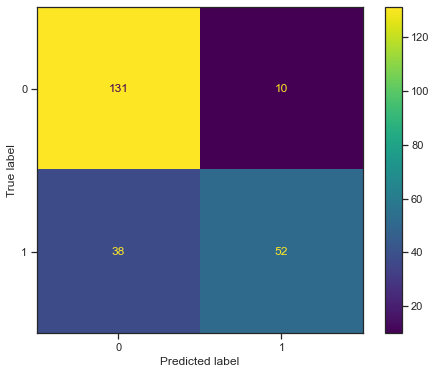

F1 Score is :  0.7922077922077922

Classification Report is :                precision    recall  f1-score   support

           0       0.78      0.93      0.85       141
           1       0.84      0.58      0.68        90

    accuracy                           0.79       231
   macro avg       0.81      0.75      0.76       231
weighted avg       0.80      0.79      0.78       231



In [144]:
from sklearn.metrics import f1_score ,classification_report , plot_confusion_matrix

y_pred = LogisticRegressionModel.predict(x_test)
plot_confusion_matrix(LogisticRegressionModel, x_test, y_test ) ;
plt.show()
 
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ', F1Score)

ClassificationReport = classification_report(y_test,y_pred) 
print('\nClassification Report is : ', ClassificationReport ) 
 


##### save the model 

In [213]:
import joblib as jb
jb.dump(LogisticRegressionModel , 'saved file.sav') 
 

['saved file.sav']

### try k. nearest Neighbors 

KNNClassifierModel Train Score is :  1.0
KNNClassifierModel Test Score is :  0.7792207792207793


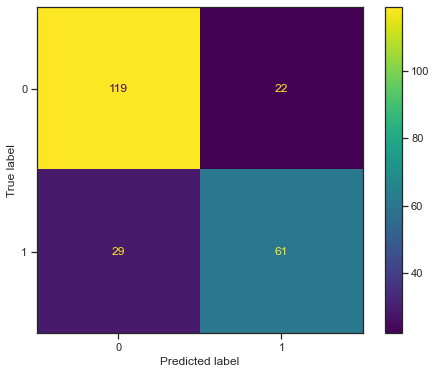

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=44, shuffle =True) 

from sklearn.neighbors import KNeighborsClassifier 

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='distance', algorithm='auto') 
KNNClassifierModel.fit(x_train, y_train)

print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train)) 
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test)) 

y_pred = KNNClassifierModel.predict(x_test)
plot_confusion_matrix(KNNClassifierModel, x_test, y_test ) ;

 - it very good at the train set but at the test data the logistic regression is better

### trying descion tree 
<p style="color:red" ><b> bad model </b></p>

In [209]:

from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=33) 
DecisionTreeClassifierModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(x_train, y_train)) 
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(x_test, y_test))

DecisionTreeRegressor Train Score is :  0.8036740349569369
DecisionTreeRegressor Test Score is :  0.009994190605821962
